Firstly Load the Data in the CitiBike Folder into a dataframe.

We will use two dataframes, one for 2014 and onefor 2015. Later in the project, we;ll decide whether to merge these into one or to keep them separate. 

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time 

In [6]:
citiBike2014_4 = pd.read_csv('Citi_Bike/2014-04 - Citi Bike trip data.csv')
citiBike2014_5 = pd.read_csv('Citi_Bike/2014-05 - Citi Bike trip data.csv')
citiBike2014_6 = pd.read_csv('Citi_Bike/2014-06 - Citi Bike trip data.csv')
citiBike2014_7 = pd.read_csv('Citi_Bike/2014-07 - Citi Bike trip data.csv')
citiBike2014_8 = pd.read_csv('Citi_Bike/2014-08 - Citi Bike trip data.csv')
citiBike2014_9 = pd.read_csv('Citi_Bike/201409-citibike-tripdata.csv')
citiBike2015_1 = pd.read_csv('Citi_Bike/201501-citibike-tripdata.csv')
citiBike2015_2 = pd.read_csv('Citi_Bike/201502-citibike-tripdata.csv')
citiBike2015_3 = pd.read_csv('Citi_Bike/201503-citibike-tripdata.csv')
citiBike2015_4 = pd.read_csv('Citi_Bike/201504-citibike-tripdata.csv')
citiBike2015_5 = pd.read_csv('Citi_Bike/201505-citibike-tripdata.csv')
citiBike2015_6 = pd.read_csv('Citi_Bike/201506-citibike-tripdata.csv')

Once the data has been loaded from different files, we will combine them into a single Dataframe using the concat method.

In [27]:
citiBike_2014_list = [citiBike2014_4, citiBike2014_5, citiBike2014_6, citiBike2014_7, citiBike2014_8, citiBike2014_9]
citiBike_2015_list = [citiBike2015_1, citiBike2015_2, citiBike2015_3, citiBike2015_4, citiBike2015_5, citiBike2015_6]

citiBike_2014 = pd.concat(citiBike_2014_list)
citiBike_2015 = pd.concat(citiBike_2015_list)

We'll concatenate the two dataframes by adding the column Years to both of them. Then we'll change the format of the trip start and stop from object to datetime 

In [28]:
citiBike_2014['year'] = 2014
citiBike_2015['year'] = 2015


In [29]:
citiBike_2014['starttime'] = pd.to_datetime(citiBike_2014['starttime'])
citiBike_2014['stoptime'] = pd.to_datetime(citiBike_2014['stoptime'])

In [30]:
citiBike_2015['starttime'] = pd.to_datetime(citiBike_2015['starttime'])
citiBike_2015['stoptime'] = pd.to_datetime(citiBike_2015['stoptime'])

In [150]:
citiBike_2014['startMonth'] = citiBike_2014['starttime'].apply(lambda x: x.month)
citiBike_2014['startDay'] = citiBike_2014['starttime'].apply(lambda x: x.dayofweek)
citiBike_2014['startDateDay'] = citiBike_2014['starttime'].apply(lambda x: x.day)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
citiBike_2014['startDay'] = citiBike_2014['startDay'].map(dmap)
citiBike_2014['startHour'] = citiBike_2014['starttime'].apply(lambda x: x.hour)


In [151]:
citiBike_2015['startMonth'] = citiBike_2015['starttime'].apply(lambda x: x.month)
citiBike_2015['startDay'] = citiBike_2015['starttime'].apply(lambda x: x.dayofweek)
citiBike_2015['startDateDay'] = citiBike_2015['starttime'].apply(lambda x: x.day)
citiBike_2015['startDay'] = citiBike_2015['startDay'].map(dmap)
citiBike_2015['startHour'] = citiBike_2015['starttime'].apply(lambda x: x.hour)
citiBike_2015['startDate'] = citiBike_2015['starttime'].apply(lambda x: x.hour)

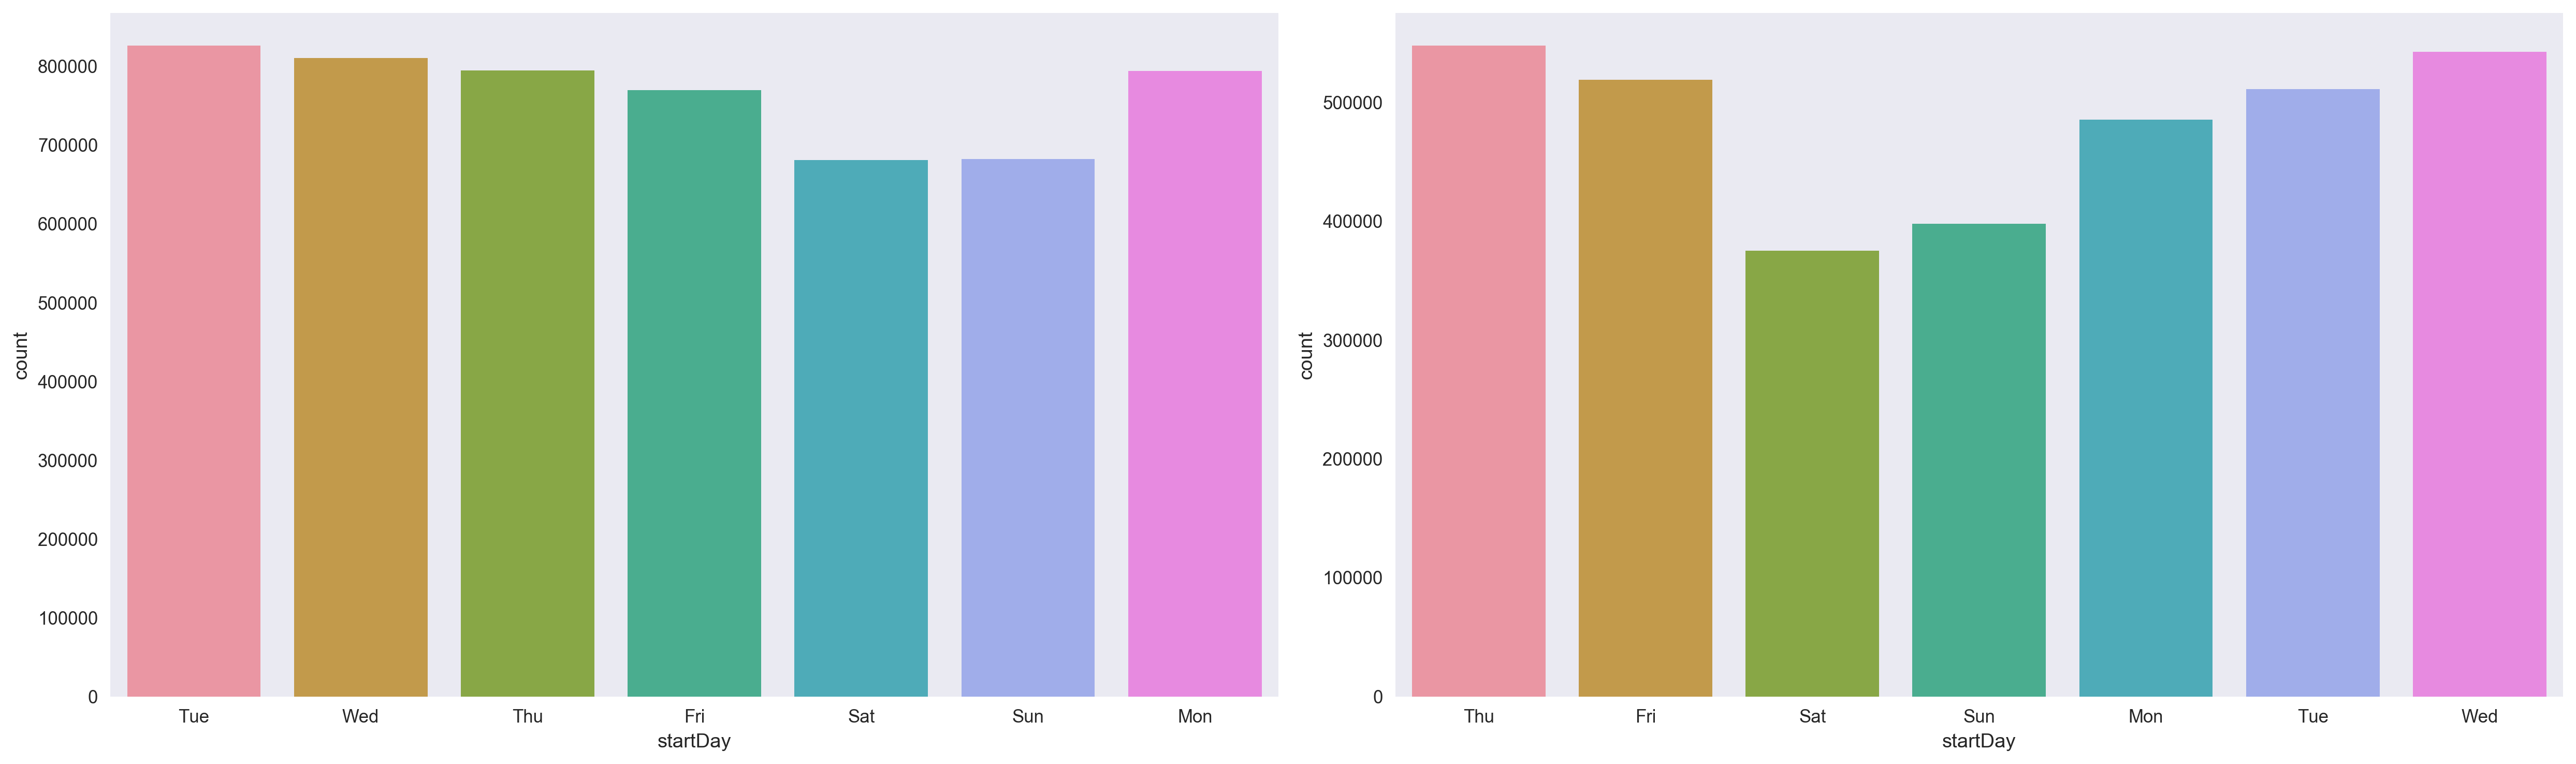

In [154]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='startDay', data=citiBike_2014)
plt.subplot(1, 2, 2)
sns.countplot(x='startDay', data=citiBike_2015)
plt.tight_layout()
plt.show()

COMPARISON OF MONTH VS DAY'S

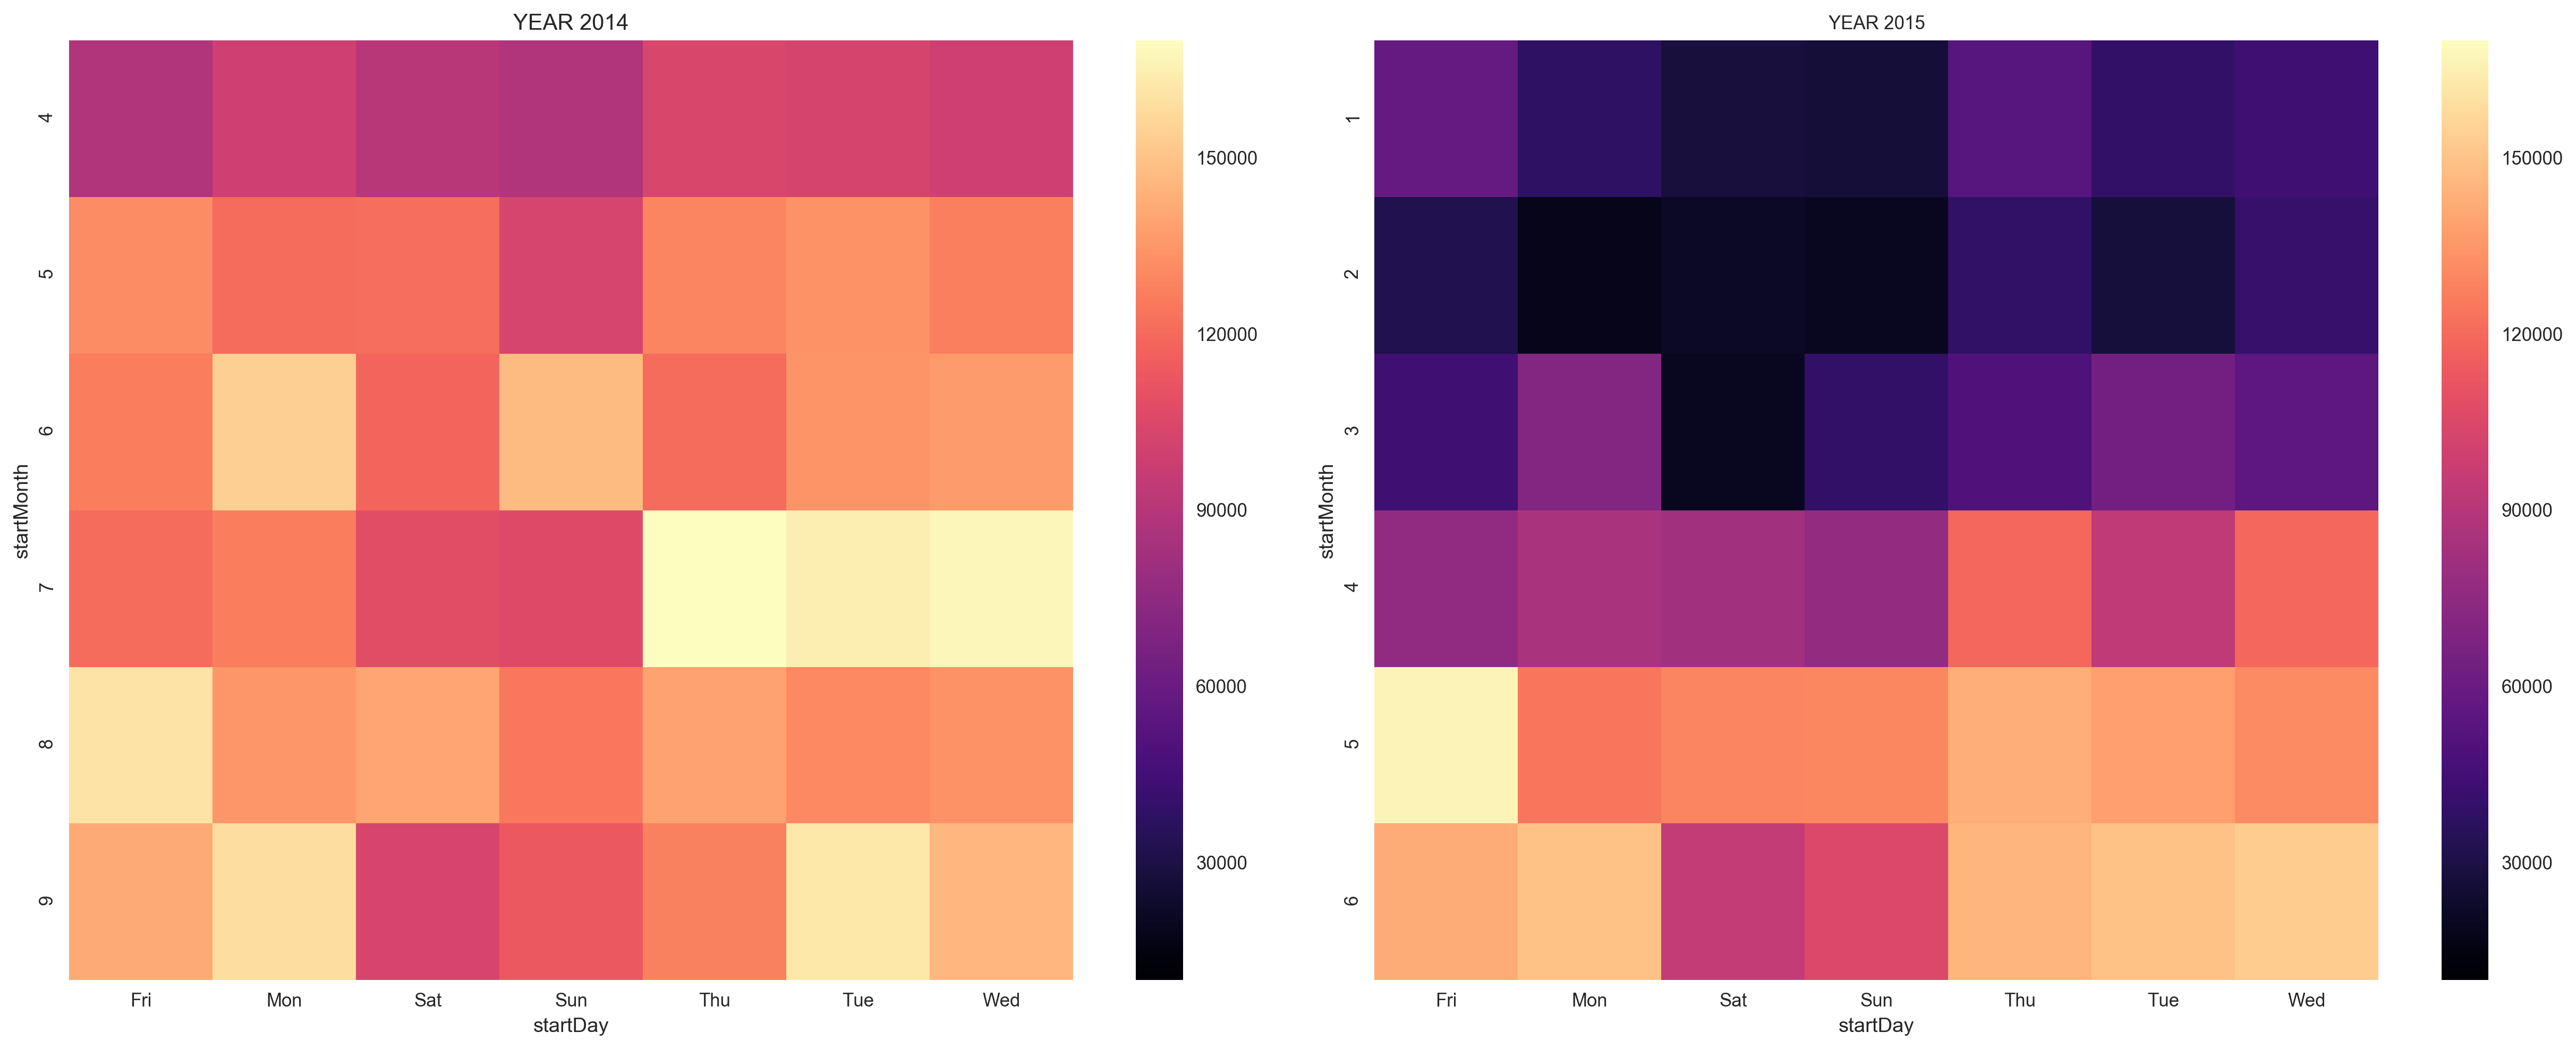

In [158]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2014', vmax=170000, vmin=10000)
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startDay']).count()['starttime'].unstack(), cmap='magma', label='2015', vmax=170000, vmin=10000)
plt.tight_layout()
plt.title('YEAR 2015', size=10 )
plt.show()

COMPARISON OF MONTH VS DAY'S

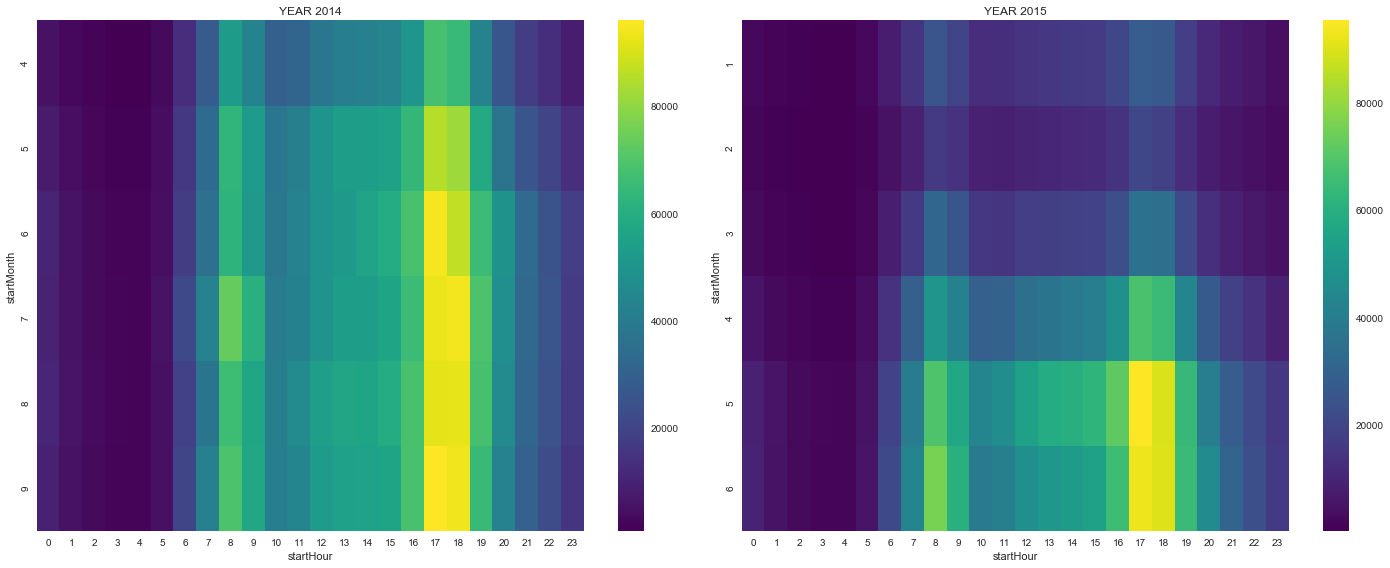

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(citiBike_2014.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2014')
plt.title('YEAR 2014')
plt.subplot(1, 2, 2)
sns.heatmap(citiBike_2015.groupby(['startMonth','startHour']).count()['starttime'].unstack(), cmap='viridis', label='2015')
plt.tight_layout()
plt.title('YEAR 2015')
plt.show()


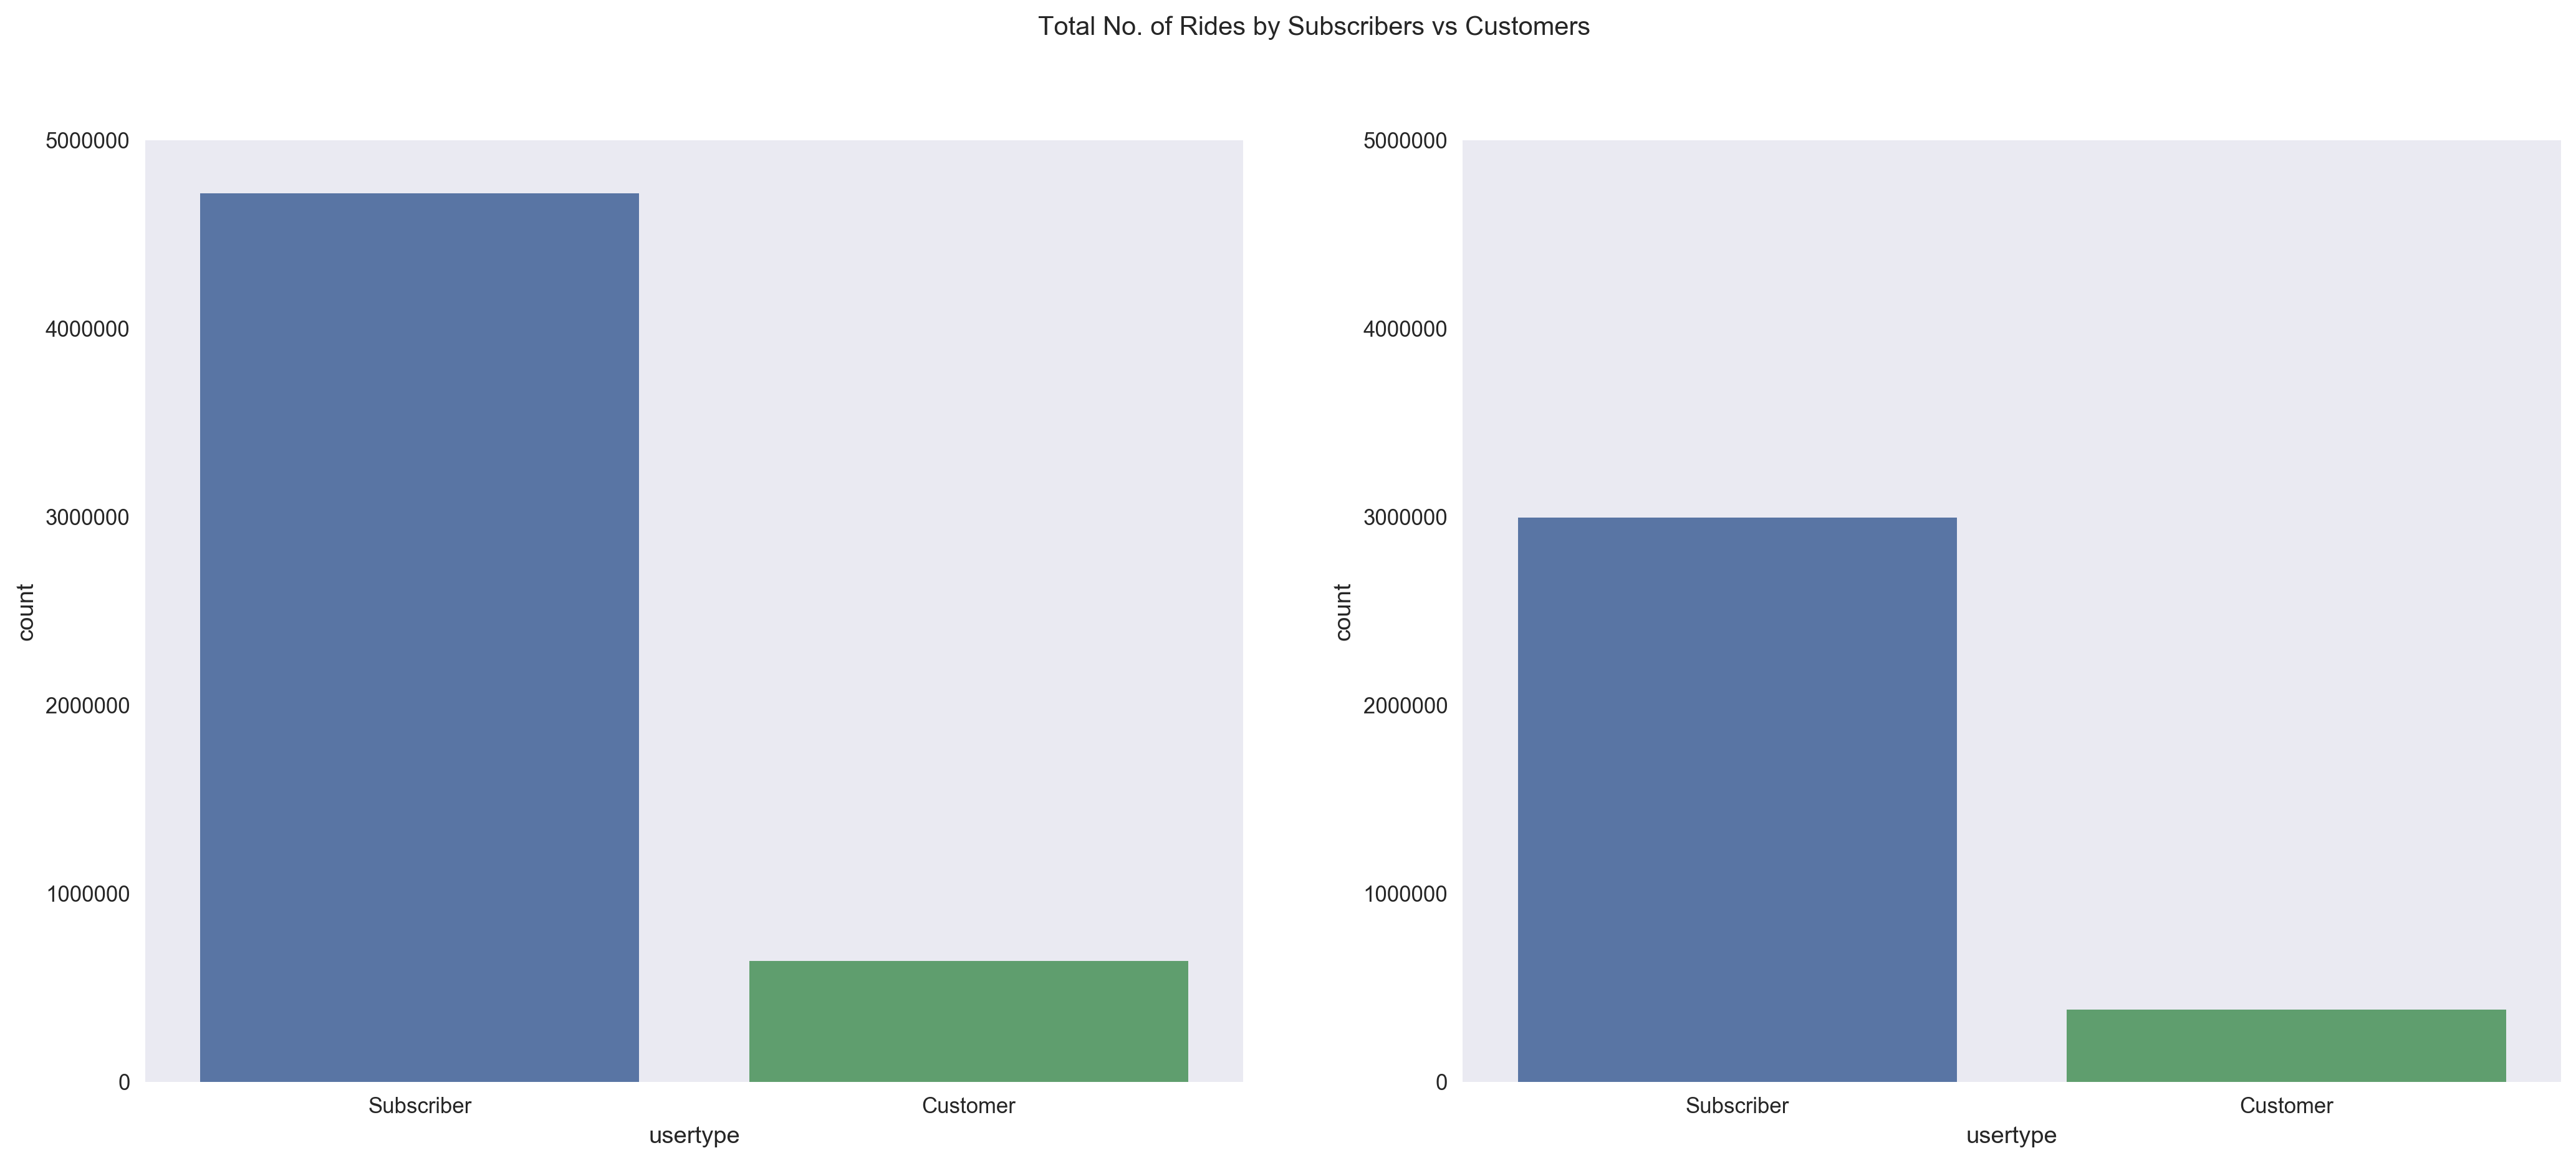

In [134]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=citiBike_2014)
b.axes.set_ylim(0,5000000)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2015)
c.axes.set_ylim(0,5000000)
plt.suptitle('Total No. of Rides by Subscribers vs Customers')

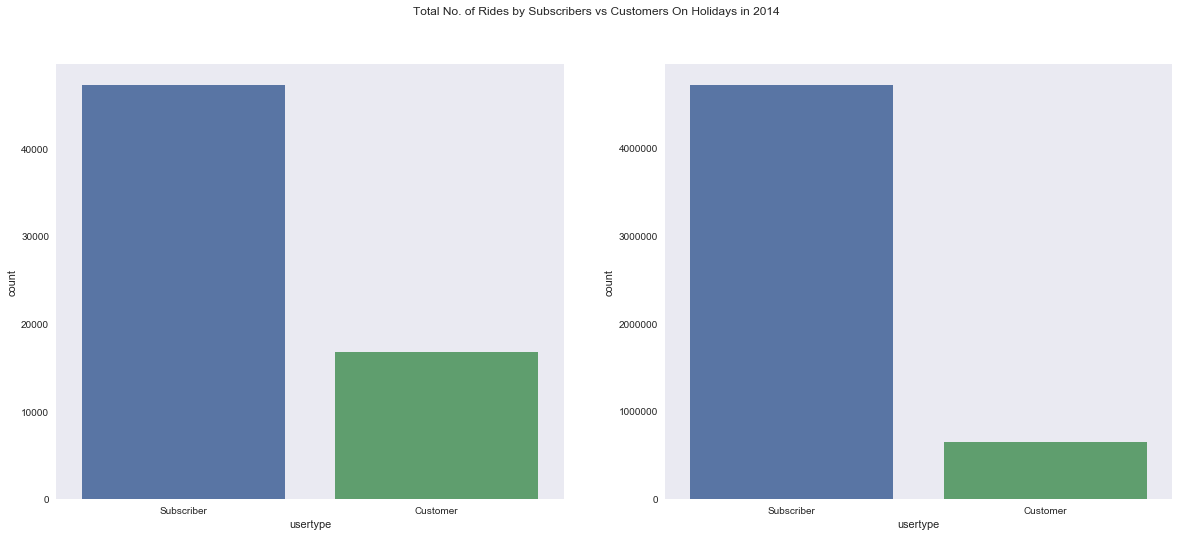

In [168]:
memorial_day = citiBike_2014[(citiBike_2014['startDateDay']==26)&(citiBike_2014['startMonth']==5)]
independence_day = citiBike_2014[(citiBike_2014['startDateDay']==4)&(citiBike_2014['startMonth']==7)]
labor_day = citiBike_2014[(citiBike_2014['startDateDay']==1)&(citiBike_2014['startMonth']==9)]
holidays_2014 = pd.concat([memorial_day,independence_day,labor_day])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
b = sns.countplot(x='usertype', data=holidays_2014)
plt.subplot(1, 2, 2)
c = sns.countplot(x='usertype', data=citiBike_2014)
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014')


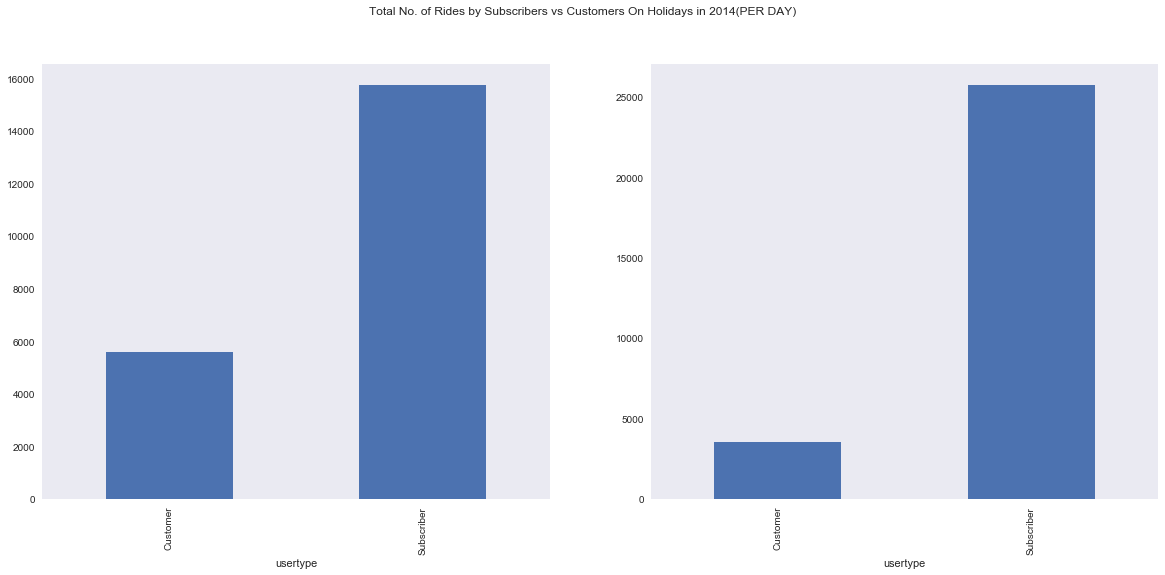

In [178]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
holidays_2014.groupby('usertype').count().apply(lambda x: x/3)['tripduration'].plot(kind='bar')
plt.subplot(1, 2, 2)
citiBike_2014.groupby('usertype').count().apply(lambda x: x/183)['tripduration'].plot(kind='bar')
plt.suptitle('Total No. of Rides by Subscribers vs Customers On Holidays in 2014(PER DAY)')



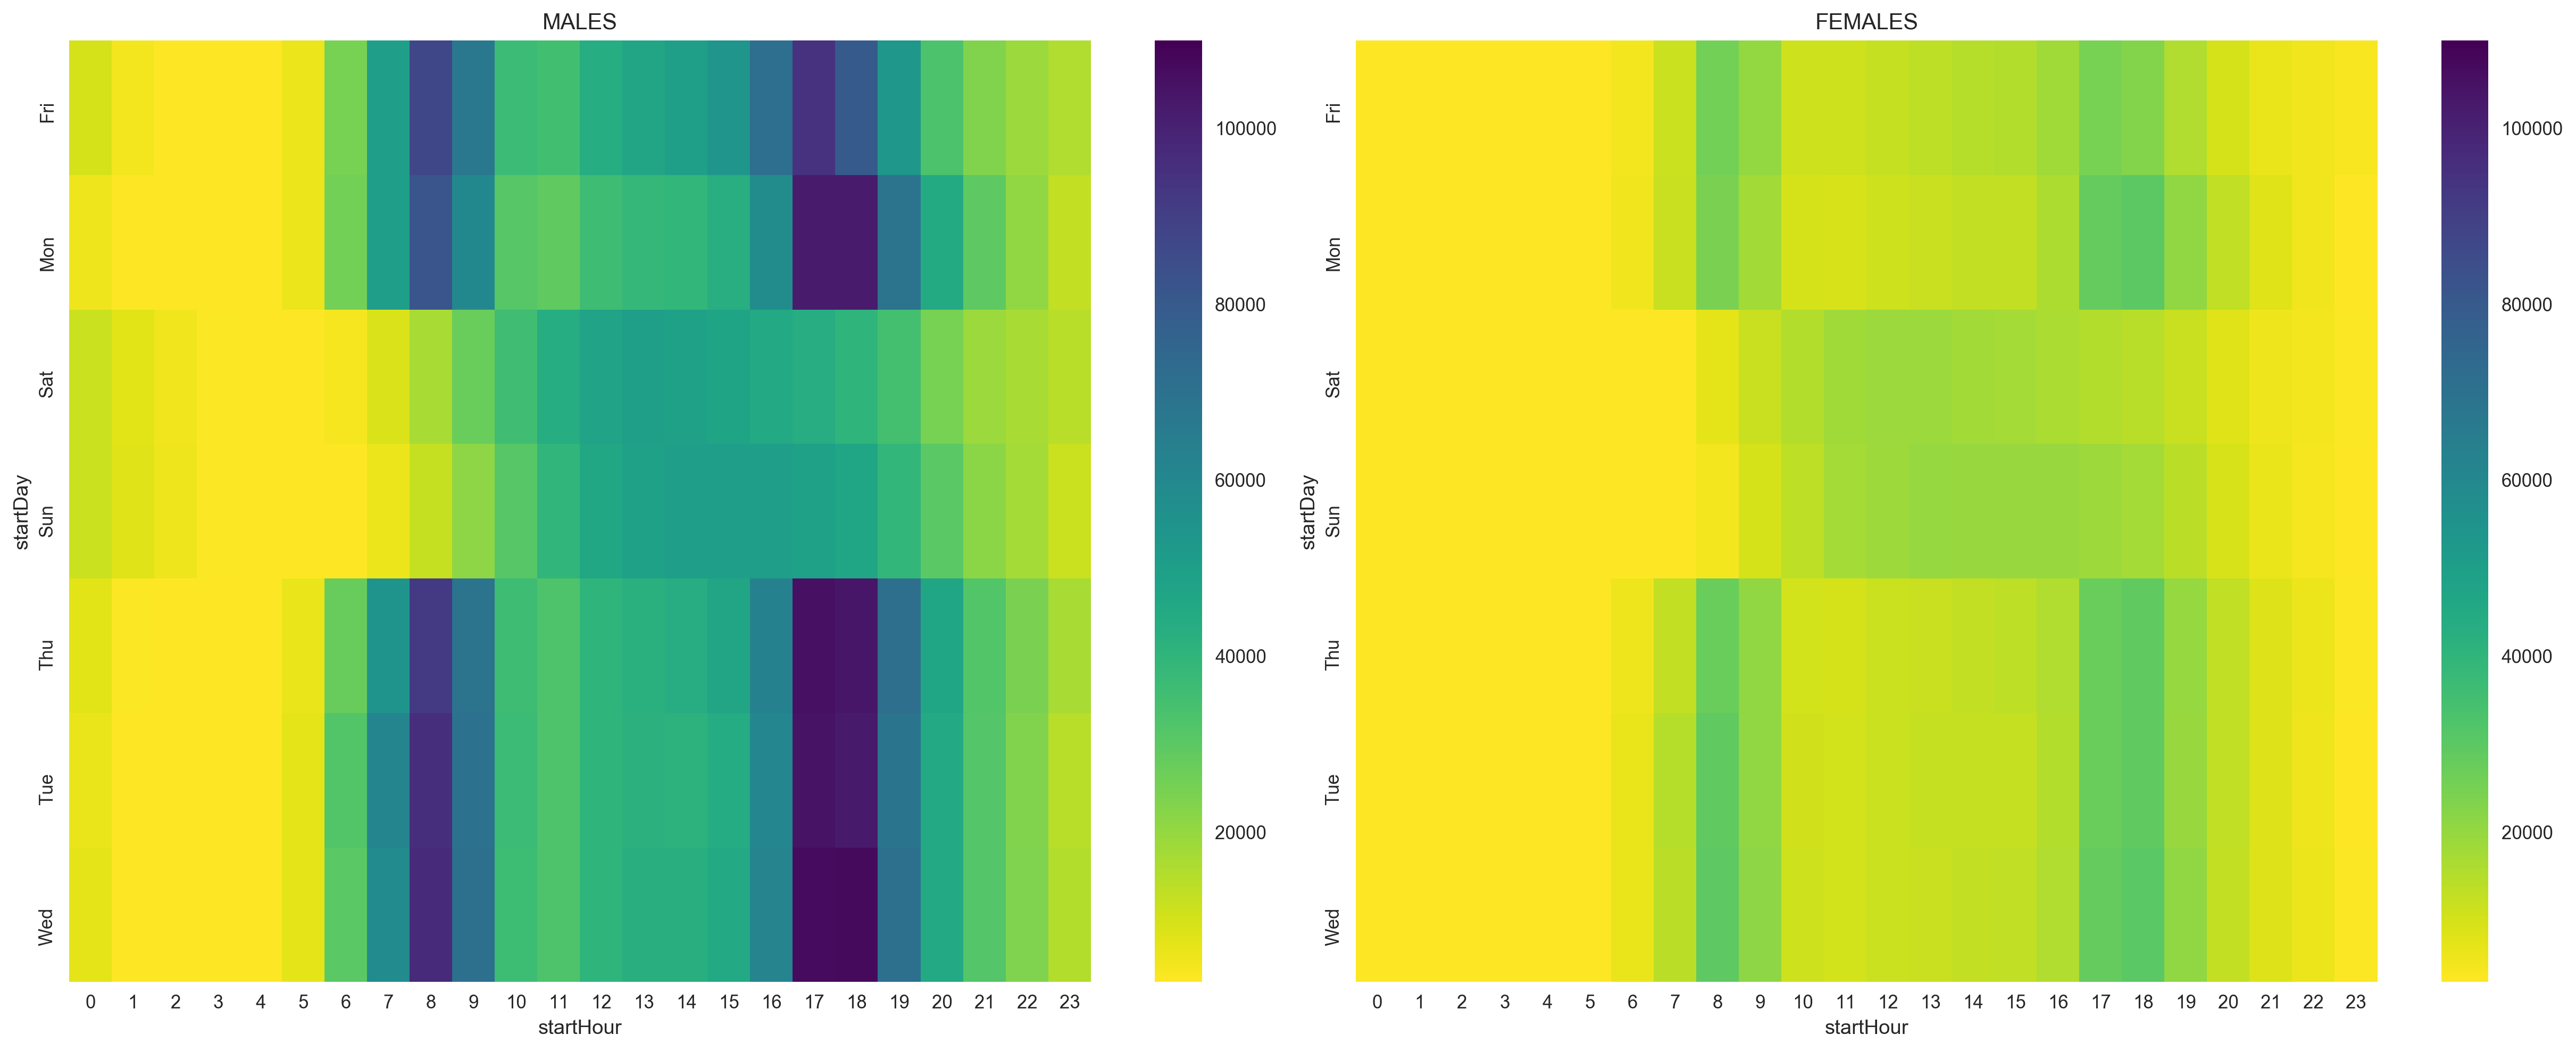

In [161]:
male_2014 = citiBike_2014[citiBike_2014['gender']==1]
female_2014 = citiBike_2014[citiBike_2014['gender']==2]
male_2015 = citiBike_2015[citiBike_2015['gender']==1]
female_2015 = citiBike_2015[citiBike_2015['gender']==2]
male = pd.concat([male_2014,male_2015])
female = pd.concat([female_2014,female_2015])

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.heatmap(male.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Males', vmax=110000, vmin=3000)
plt.title('MALES')
plt.subplot(1, 2, 2)
sns.heatmap(female.groupby(['startDay','startHour']).count()['starttime'].unstack(), cmap='viridis_r', label='Females', vmax=110000, vmin=3000)
plt.tight_layout()
plt.title('FEMALES')
plt.tight_layout()
plt.show()

 

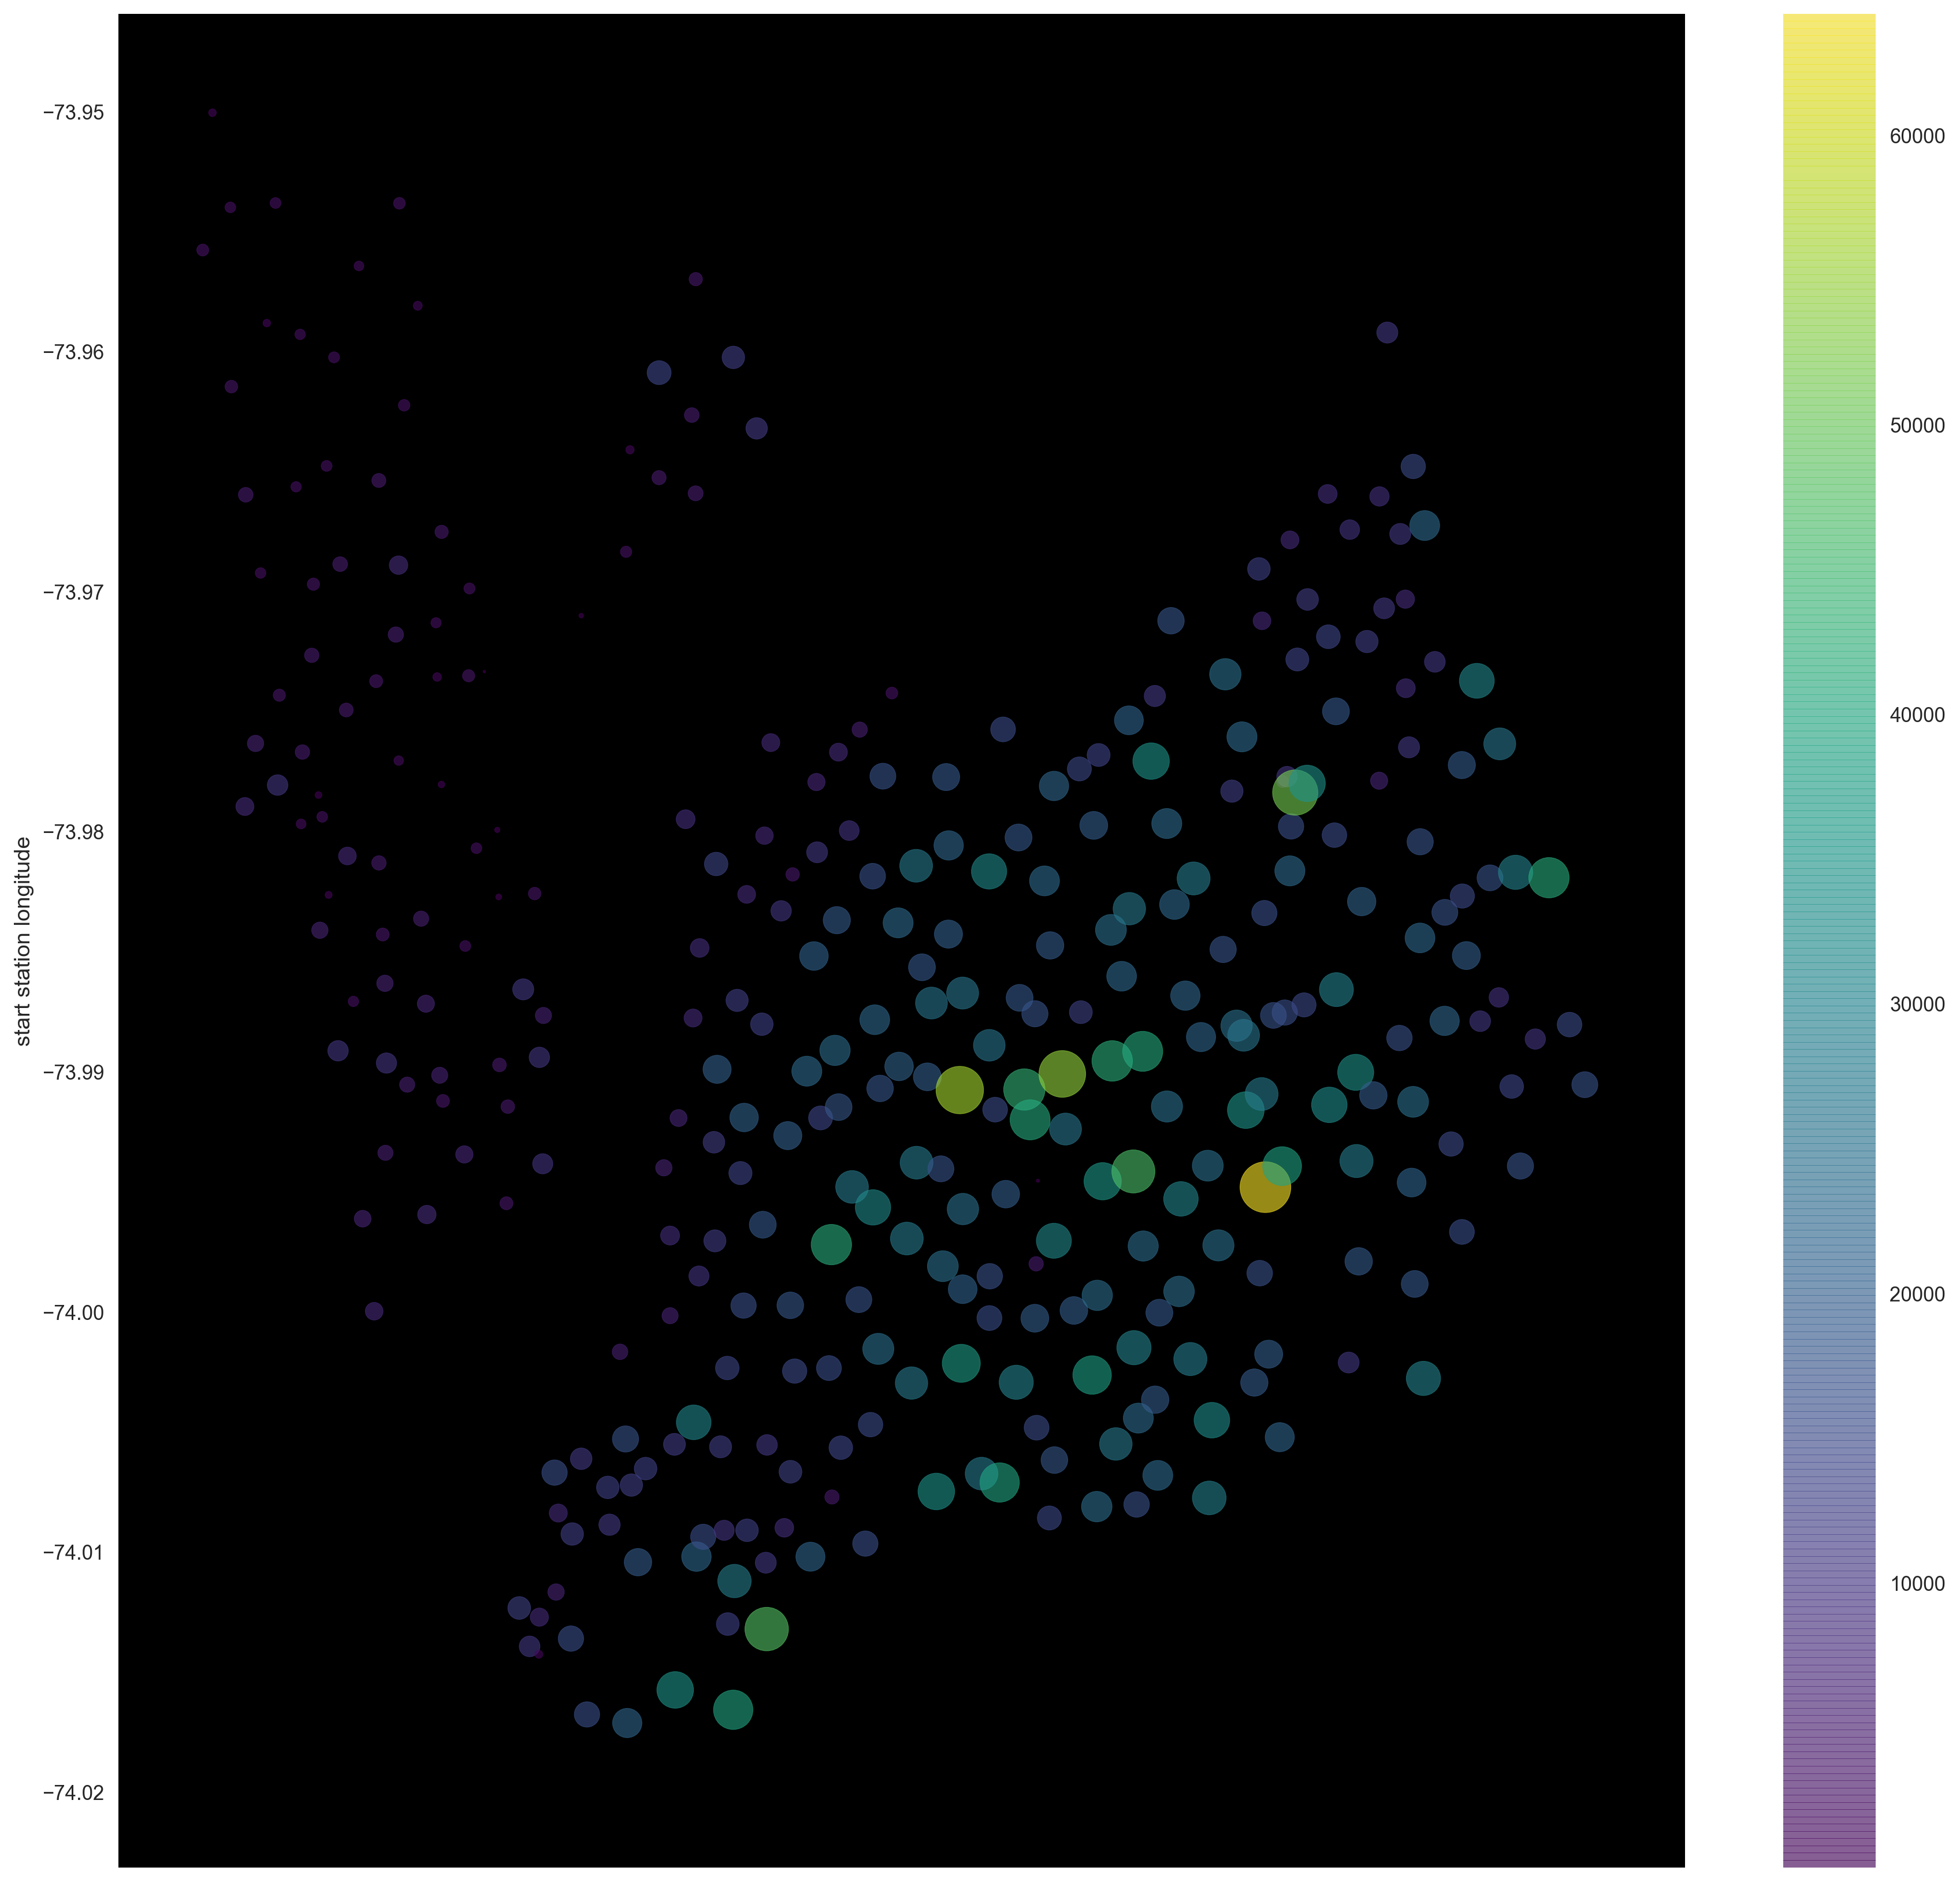

In [120]:
a = citiBike_2014.groupby(['start station latitude','start station longitude']).count().reset_index()
a.plot(kind='scatter', x='start station latitude', y='start station longitude', alpha=0.6, c=a['tripduration'], s=a['tripduration']/100,cmap='viridis', ylim=[-74.02,-73.95], xlim=[]).set_facecolor('black')

